# Integrated assessment (Hotel booking)



This data article describes two datasets with hotel demand data. One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). Both datasets share the same structure, with 31 variables describing the 40,060 observations of H1 and 79,330 observations of H2. Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled.

(Jesse Mostipak, 2020)

Features:

* hotel
Hotel (H1 = Resort Hotel or H2 = City Hotel)
* is_canceled
Value indicating if the booking was canceled (1) or not (0)
* lead_time
Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
* arrival_date_year
Year of arrival date
* arrival_date_month
Month of arrival date
* arrival_date_week_number
Week number of year for arrival date
* arrival_date_day_of_month
Day of arrival date
* stays_in_weekend_nights
Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* stays_in_week_nights
Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* adults
Number of adults
* children
Number of children
* babies
Number of babies
* meal
Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
* country
Country of origin. Categories are represented in the ISO 3155–3:2013 format
* market_segment
Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
* distribution_channel
Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
* is_repeated_guest
Value indicating if the booking name was from a repeated guest (1) or not (0)
* previous_cancellations
Number of previous bookings that were cancelled by the customer prior to the current booking
* previous_bookings_not_canceled
Number of previous bookings not cancelled by the customer prior to the current booking
* reserved_room_type
Code of room type reserved. Code is presented instead of designation for anonymity reasons.
* assigned_room_type
Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
* booking_changes
Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check--in or cancellation
* deposit_type
Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
* agent
ID of the travel agency that made the booking
* company
ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
* days_in_waiting_list
Number of days the booking was in the waiting list before it was confirmed to the customer
* customer_type
Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
* adr
Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
* required_car_parking_spaces
Number of car parking spaces required by the customer
* total_of_special_requests
Number of special requests made by the customer (e.g. twin bed or high floor)
* reservation_status
Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why
* reservation_status_date
Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar 
from spellchecker import SpellChecker
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split
from PIL import Image
warnings.filterwarnings('ignore')
plt.style.use('seaborn-darkgrid')


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

First step is read the Dataset into jupyter notebook.

url = https://www.kaggle.com/jessemostipak/hotel-booking-demand

In [2]:
booking = pd.read_csv('hotel_bookings.csv')

Use info function helps to view type, quantity and features of the data.

In [3]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Another way to do a data review is to use the head function which shows a less general view.

In [4]:
pd.set_option('display.max_columns', None)
booking.head(10)

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   
5  Resort Hotel            0         14               2015               July   
6  Resort Hotel            0          0               2015               July   
7  Resort Hotel            0          9               2015               July   
8  Resort Hotel            1         85               2015               July   
9  Resort Hotel            1         75               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   
5                        27                          1   
6                        27                          1   
7                        27                          1   
8                        27                          1   
9                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   
5                        0                     2       2       0.0       0   
6                        0                     2       2       0.0       0   
7                        0                     2       2       0.0       0   
8                        0                     3       2       0.0       0   
9                        0                     3       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   
5   BB     GBR      Online TA                TA/TO                  0   
6   BB     PRT         Direct               Direct                  0   
7   FB     PRT         Direct               Direct                  0   
8   BB     PRT      Online TA                TA/TO                  0   
9   HB     PRT  Offline TA/TO                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   
5                       0                               0                  A   
6                       0                               0                  C   
7                       0                               0                  C   
8                       0                               0                  A   
9               

now checking if there is any missing or null value.

In [5]:
booking.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

The last function showed that the column 'company' has a lot of missing or null values, so it is better.

In [6]:
booking = booking.drop(columns = ['company'])

After removing the company, a good option is to check if some null or missing values are still in the dataset, being true, using dropna, we can get rid of them. To ensure that those values are no longer present, isnull.values.any is used.

In [7]:
booking.isnull().values.any()

True

In [8]:
booking = booking.dropna(axis=0)

In [9]:
print(booking.isnull().values.any())    


False


eliminating one column and rows with missing or null values, now the new shape of the dataset is 102.894 rows and 31 columns.

In [10]:
booking.shape

(102894, 31)

In order to sort the values using the date time of each booking, the columns 'arrival_date_year', 'arrival_date_month' and 'arrival_date_day_of_month'(arrival_date_week_number was dropped because is not necessary for create the new column) are gathered in one column called 'arrival_date', using this column is possible sort by date all the data.
Timing columns were remove for the reason that 'arrival_date' is a summary of them, few more columns were eliminated since did not present relevant information. 

In [11]:
booking = booking.drop(columns = ['arrival_date_week_number'])
booking['arrivale_date'] = booking.apply(lambda x:'%s %s %s' % (x['arrival_date_year'],x['arrival_date_month'], x['arrival_date_day_of_month']),axis=1)
booking['arrivale_date'] = pd.to_datetime(booking['arrivale_date'], dayfirst=True)
booking['reservation_status_date'] = pd.to_datetime(booking['reservation_status_date'])
booking = booking.drop(columns = ['market_segment', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'previous_bookings_not_canceled', 'agent'])

Children was modified from float64 to int64 because is not possible have point decimal quantity of children and 'adr' was modified to be able to work properly with it.
By displaying the dataset it is possible see all the changes made.

In [12]:
booking['children'] = booking['children'].astype(int)
booking['adr'] = booking['adr'].astype(int)
booking = booking.sort_values(by='arrivale_date')

In [13]:
pd.set_option('display.max_rows', None)
booking.head(100)

hotel  is_canceled  lead_time  stays_in_weekend_nights  \
3      Resort Hotel            0         13                        0   
75551    City Hotel            0        257                        0   
75552    City Hotel            0        257                        0   
75553    City Hotel            0        257                        0   
75554    City Hotel            0        257                        0   
75555    City Hotel            0        257                        0   
75556    City Hotel            0        257                        0   
75557    City Hotel            0        257                        0   
75558    City Hotel            0        257                        0   
75559    City Hotel            0        257                        0   
75560    City Hotel            0        257                        0   
75561    City Hotel            0        257                        0   
75550    City Hotel            0        257                        0   
75562    City Hotel            0        257                        0   
75564    City Hotel            0        257                        0   
75565    City Hotel            0        257                        0   
75566    City Hotel            0        257                        0   
75567    City Hotel            0        257                        0   
75568    City Hotel            0        257                        0   
75569    City Hotel            0        257                        0   
75570    City Hotel            0        257                        0   
75571    City Hotel            0        257                        0   
75572    City Hotel            0        257                        0   
75573    City Hotel            0        257                        0   
75574    City Hotel            0        257                        0   
75563    City Hotel            0        257                        0   
75575    City Hotel            0        257                        0   
75549    City Hotel            0        257                        0   
75546    City Hotel            0        257                        0   
15298  Resort Hotel            0        181                        0   
15299  Resort Hotel            0        126                        0   
15304  Resort Hotel            0        110                        1   
15332  Resort Hotel            0        145                        2   
15334  Resort Hotel            0        149                        2   
15335  Resort Hotel            0        149                        2   
40060    City Hotel            0          6                        0   
40061    City Hotel            1         88                        0   
40062    City Hotel            1         65                        0   
40063    City Hotel            1         92                        2   
75607    City Hotel            0        257                        0   
75547    City Hotel            0        257                        0   
76153    City Hotel            0        181                        1   
74966    City Hotel            1        257                        0   
74967    City Hotel            1        257                        0   
74968    City Hotel            1        257                        0   
74969    City Hotel            1        257                        0   
74970    City Hotel            1        257                        0   
74971    City Hotel            1        257                        0   
74972    City Hotel            1        257                        0   
74973    City Hotel            1        257                        0   
74999    City Hotel            1        181                        1   
75000    City Hotel            1        181                        0   
75001    City Hotel            1        181                        0   
76152    City Hotel            0        181                        1   
75576    City Hotel            0        257           

Now is the time to analyze the central tendency of two features of the data set, selecting "stays_in_night_de_week" and "stays_in_night_de_week" we have to calculate the median, mode, mean and standard deviation, this will help us understand the behavior of variables.

In [14]:
stays_in_weekend_nights_median = booking["stays_in_weekend_nights"].median()
print("stays_in_weekend_nights median = ",stays_in_weekend_nights_median)
stays_in_weekend_nights_mode = booking["stays_in_weekend_nights"].mode()
print("stays_in_weekend_nights mode = ",stays_in_weekend_nights_mode)
stays_in_weekend_nights_mean = booking["stays_in_weekend_nights"].mean()
print("stays_in_weekend_nights mean = ",stays_in_weekend_nights_mean)
stays_in_weekend_nights_std = booking["stays_in_weekend_nights"].std()
print("Standard deviation of stays_in_weekend_nights: ", stays_in_weekend_nights_std)

stays_in_weekend_nights median =  1.0
stays_in_weekend_nights mode =  0    0
dtype: int64
stays_in_weekend_nights mean =  0.9781814294322312
Standard deviation of stays_in_weekend_nights:  1.0039914186439263


In [15]:
stays_in_week_nights_median = booking["stays_in_week_nights"].median()
print("stays_in_week_nights median = ",stays_in_week_nights_median)
stays_in_week_nights_mode = booking["stays_in_week_nights"].mode()
print("stays_in_week_nights mode = ",stays_in_week_nights_mode)
stays_in_week_nights_mean = booking["stays_in_week_nights"].mean()
print("stays_in_week_nights mean = ",stays_in_week_nights_mean)
stays_in_week_nights_std = booking["stays_in_week_nights"].std()
print("Standard deviation of stays_in_week_nights: ", stays_in_week_nights_std)

stays_in_week_nights median =  2.0
stays_in_week_nights mode =  0    2
dtype: int64
stays_in_week_nights mean =  2.5896553734911656
Standard deviation of stays_in_week_nights:  1.9059414480496166


One way te obtain the values of central tendency rapidly is using the describe function. Depending what features we need to analyze describe coul be used with qualitative or quantitative data.

In [16]:
booking.describe()

is_canceled      lead_time  stays_in_weekend_nights  \
count  102894.000000  102894.000000            102894.000000   
mean        0.390314     111.740092                 0.978181   
std         0.487823     107.681013                 1.003991   
min         0.000000       0.000000                 0.000000   
25%         0.000000      26.000000                 0.000000   
50%         0.000000      79.000000                 1.000000   
75%         1.000000     169.000000                 2.000000   
max         1.000000     629.000000                16.000000   

       stays_in_week_nights         adults       children         babies  \
count         102894.000000  102894.000000  102894.000000  102894.000000   
mean               2.589655       1.899926       0.111231       0.007697   
std                1.905941       0.490891       0.411982       0.097089   
min                0.000000       0.000000       0.000000       0.000000   
25%                1.000000       2.000000       0.000000       0.000000   
50%                2.000000       2.000000       0.000000       0.000000   
75%                3.000000       2.000000       0.000000       0.000000   
max               41.000000      26.000000      10.000000      10.000000   

       is_repeated_guest  previous_cancellations  booking_changes  \
count      102894.000000           102894.000000    102894.000000   
mean            0.014034                0.077215         0.201780   
std             0.117631                0.758185         0.624954   
min             0.000000                0.000000         0.000000   
25%             0.000000                0.000000         0.000000   
50%             0.000000                0.000000         0.000000   
75%             0.000000                0.000000         0.000000   
max             1.000000               26.000000        18.000000   

       days_in_waiting_list            adr  required_car_parking_spaces  \
count         102894.000000  102894.000000                102894.000000   
mean               2.619579     104.452981                     0.053035   
std               18.797440      50.020819                     0.225359   
min                0.000000      -6.000000                     0.000000   
25%                0.000000      73.000000                     0.000000   
50%                0.000000      96.000000                     0.000000   
75%                0.000000     127.000000                     0.000000   
max              391.000000    5400.000000                     3.000000   

       total_of_special_requests  
count              102894.000000  
mean                    0.605458  
std                     0.799342  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     5.000000

In [17]:
booking.describe(include = object)

hotel    meal country distribution_channel reserved_room_type  \
count       102894  102894  102894               102894             102894   
unique           2       5     174                    4                  8   
top     City Hotel      BB     PRT                TA/TO                  A   
freq         71181   77638   37591                94575              73265   

       assigned_room_type deposit_type customer_type reservation_status  
count              102894       102894        102894             102894  
unique                 10            3             4                  3  
top                     A   No Deposit     Transient          Check-Out  
freq                64502        90324         77756              62733

Considering 'adr' as the average price for a certain number of days of stay in the hotel, it is good to know the minimum price that was paid. Surprisingly the value is negative, therefore without proof that it is an error it cannot be erased.

In [18]:
print(booking[['adr']][booking.adr == booking['adr'].min()])

       adr
14969   -6


In [19]:
booking.loc[14969]

hotel                                 Resort Hotel
is_canceled                                      0
lead_time                                      195
stays_in_weekend_nights                          4
stays_in_week_nights                             6
adults                                           2
children                                         0
babies                                           0
meal                                            BB
country                                        GBR
distribution_channel                        Direct
is_repeated_guest                                1
previous_cancellations                           0
reserved_room_type                               A
assigned_room_type                               H
booking_changes                                  2
deposit_type                            No Deposit
days_in_waiting_list                             0
customer_type                      Transient-Party
adr                            

It is possible plot the variables in order to see graphically the behaviour of each feature and compare it with the two that are being analyzed. First plot Histogram show the skewness and the second one boxplot show the presence of outliers and the median of each one.

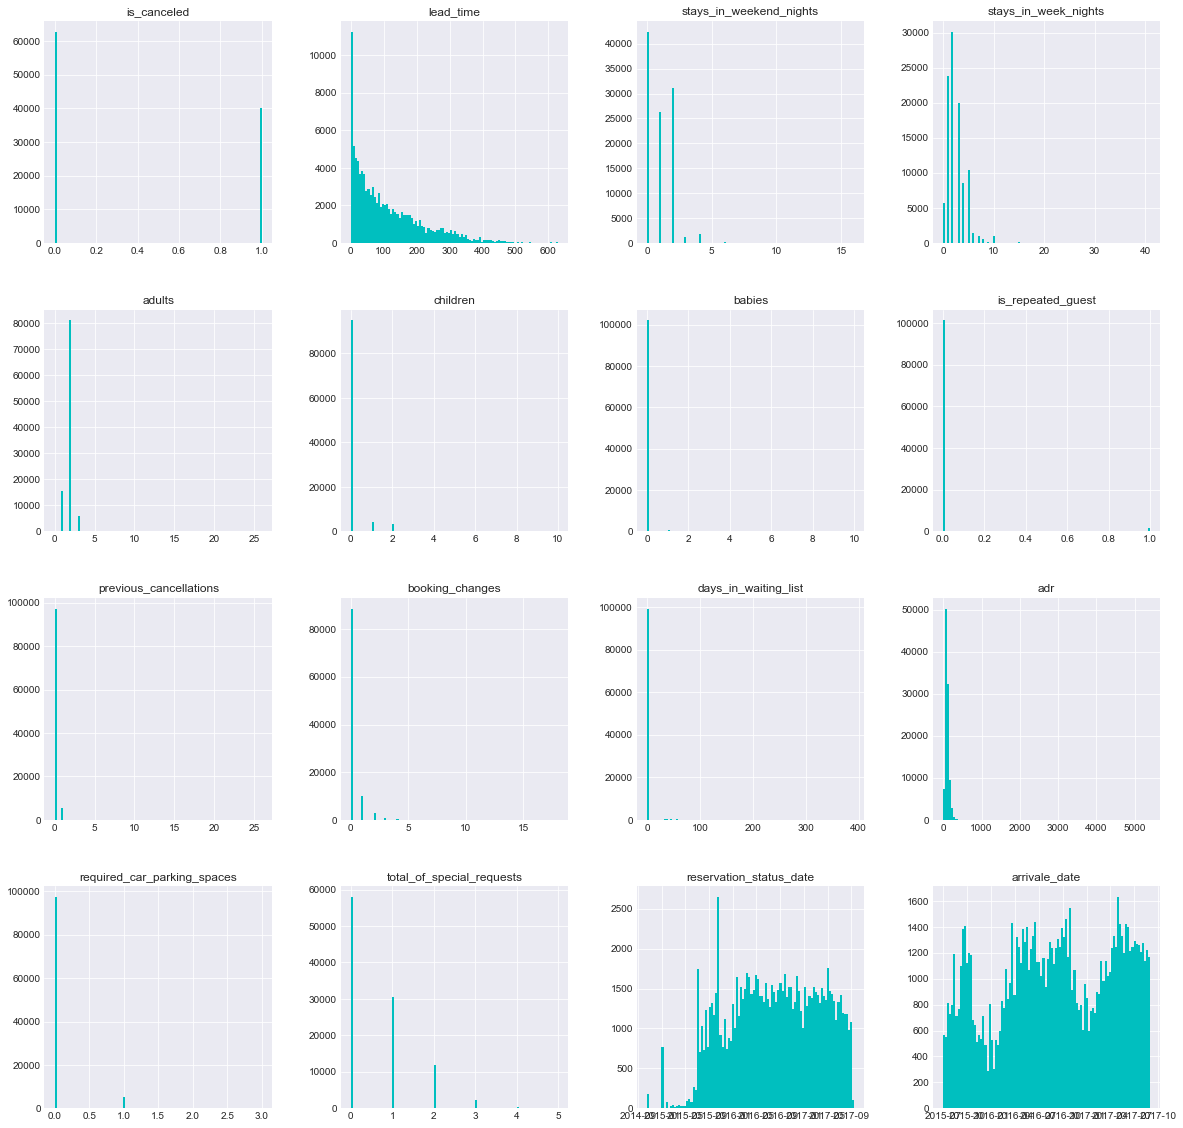

In [20]:
booking.hist(bins=100, figsize=(20,20), color='c');

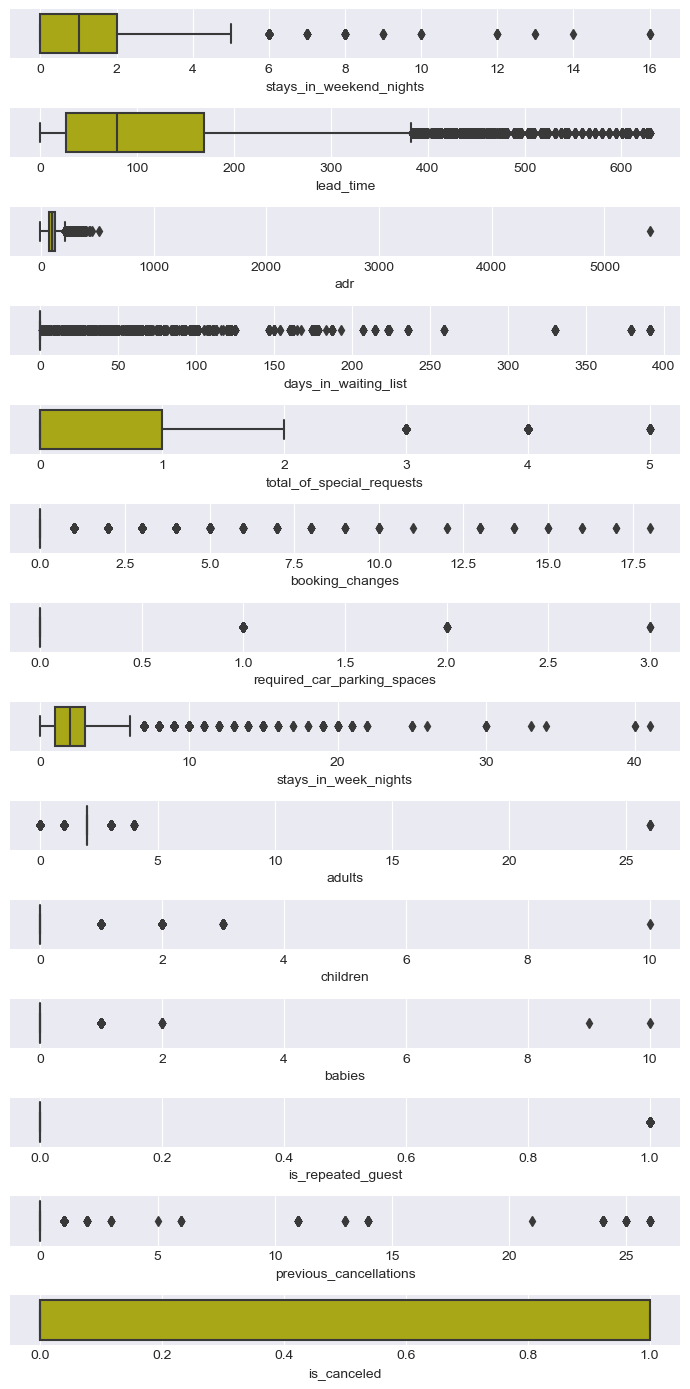

In [21]:
fig, ax = plt.subplots(14,1, dpi=100, figsize=(7,14))

sns.boxplot(x="stays_in_weekend_nights", data=booking, color='y', ax=ax[0])
sns.boxplot(x="lead_time", data=booking, color='y',ax=ax[1])
sns.boxplot(x="adr", data=booking, color='y',ax=ax[2])
sns.boxplot(x="days_in_waiting_list", data=booking, color='y',ax=ax[3])
sns.boxplot(x="total_of_special_requests", data=booking, color='y',ax=ax[4])
sns.boxplot(x="booking_changes", data=booking, color='y',ax=ax[5])
sns.boxplot(x="required_car_parking_spaces", data=booking, color='y',ax=ax[6])
sns.boxplot(x="stays_in_week_nights", data=booking, color='y',ax=ax[7])
sns.boxplot(x="adults", data=booking, color='y',ax=ax[8])
sns.boxplot(x="children", data=booking, color='y',ax=ax[9])
sns.boxplot(x="babies", data=booking, color='y',ax=ax[10])
sns.boxplot(x="is_repeated_guest", data=booking, color='y',ax=ax[11])
sns.boxplot(x="previous_cancellations", data=booking, color='y',ax=ax[12])
sns.boxplot(x="is_canceled", data=booking, color='y',ax=ax[13])


plt.tight_layout();

skew funtion is a easy way to understand if variables have a normal distribution, clearly no one of this features have a normal distribution.

In [22]:
print(booking.skew())

is_canceled                     0.449703
lead_time                       1.298261
stays_in_weekend_nights         1.187951
stays_in_week_nights            2.628639
adults                          5.307125
children                        3.950101
babies                         27.032803
is_repeated_guest               8.262715
previous_cancellations         28.157765
booking_changes                 6.138974
days_in_waiting_list           11.251924
adr                            12.434555
required_car_parking_spaces     4.077949
total_of_special_requests       1.240692
dtype: float64


Finding the correlation between variables is an important task when analyzing a dataset, this shows which variables are dependet and independet one to each other. In this case the variables 'stays_in_weekend_nights' and 'stays_in_week_nights' have the strongest correlation.

is_canceled  lead_time  stays_in_weekend_nights  \
is_canceled                     1.000000   0.277666                -0.023589   
lead_time                       0.277666   1.000000                 0.047674   
stays_in_weekend_nights        -0.023589   0.047674                 1.000000   
stays_in_week_nights            0.003918   0.124195                 0.486350   
adults                          0.037057   0.072477                 0.070997   
children                        0.005409  -0.049796                 0.039961   
babies                         -0.032038  -0.021975                 0.020068   
is_repeated_guest              -0.029913  -0.055432                -0.056987   
previous_cancellations          0.117983   0.100271                -0.003021   
booking_changes                -0.131714  -0.000282                 0.054693   
days_in_waiting_list            0.052475   0.170352                -0.064610   
adr                             0.023808  -0.112922                 0.014992   
required_car_parking_spaces    -0.188298  -0.111226                -0.011037   
total_of_special_requests      -0.257934  -0.123047                 0.056110   

                             stays_in_week_nights    adults  children  \
is_canceled                              0.003918  0.037057  0.005409   
lead_time                                0.124195  0.072477 -0.049796   
stays_in_weekend_nights                  0.486350  0.070997  0.039961   
stays_in_week_nights                     1.000000  0.071890  0.039922   
adults                                   0.071890  1.000000  0.014385   
children                                 0.039922  0.014385  1.000000   
babies                                   0.021008  0.013307  0.016742   
is_repeated_guest                       -0.057415 -0.073802 -0.018975   
previous_cancellations                  -0.013591 -0.003366 -0.025070   
booking_changes                          0.081598 -0.051995  0.055324   
days_in_waiting_list                    -0.009330 -0.022945 -0.036455   
adr                                      0.034810  0.236518  0.335455   
required_car_parking_spaces             -0.016376  0.036907  0.065531   
total_of_special_requests                0.050318  0.116793  0.068130   

                               babies  is_repeated_guest  \
is_canceled                 -0.032038          -0.029913   
lead_time                   -0.021975          -0.055432   
stays_in_weekend_nights      0.020068          -0.056987   
stays_in_week_nights         0.021008          -0.057415   
adults                       0.013307          -0.073802   
children                     0.016742          -0.018975   
babies                       1.000000          -0.006906   
is_repeated_guest           -0.006906           1.000000   
previous_cancellations      -0.007150           0.073284   
booking_changes              0.094213          -0.000578   
days_in_waiting_list        -0.010894          -0.015835   
adr                          0.025522          -0.092554   
required_car_parking_spaces  0.039087           0.028749   
total_of_special_requests    0.091729           0.004312   

                             previous_cancellations  booking_changes  \
is_canceled                                0.117983        -0.131714   
lead_time                                  0.100271        -0.000282   
stays_in_weekend_nights                   -0.003021         0.054693   
stays_in_week_nights                      -0.013591         0.081598   
adults                                    -0.003366        -0.051995   
children                                  -0.025070         0.055324   
babies                                    -0.007150         0.094213   
is_repeated_guest                          0.073284        -0.000578   
previous_cancellations                     1.000000        -0.029375   
booking_changes                           -0.029375         1.000000   
days_in_waiting_list                   

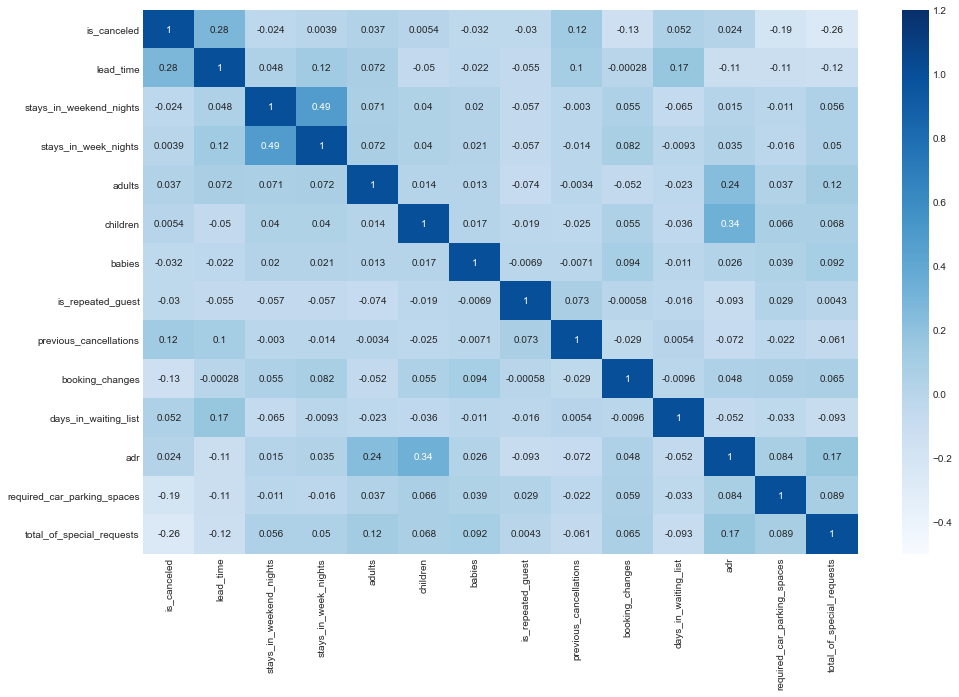

In [23]:
plt.figure(figsize=(16,10))
C = booking.corr()
sns.heatmap(C,cmap="Blues", vmin=-0.5, vmax=1.2, annot=True);
C

Pearson correlation is a specific parametric meausre that help us understand which variables are co-dependet and how strong is the linear relationship, in this case 'stays_in_week_nights' and 'stays_in_weekend_nights' even thought, it is just a moderate correlation,it is the strongest one in the dataset.

In [24]:
booking.corr(method='pearson')

is_canceled  lead_time  stays_in_weekend_nights  \
is_canceled                     1.000000   0.277666                -0.023589   
lead_time                       0.277666   1.000000                 0.047674   
stays_in_weekend_nights        -0.023589   0.047674                 1.000000   
stays_in_week_nights            0.003918   0.124195                 0.486350   
adults                          0.037057   0.072477                 0.070997   
children                        0.005409  -0.049796                 0.039961   
babies                         -0.032038  -0.021975                 0.020068   
is_repeated_guest              -0.029913  -0.055432                -0.056987   
previous_cancellations          0.117983   0.100271                -0.003021   
booking_changes                -0.131714  -0.000282                 0.054693   
days_in_waiting_list            0.052475   0.170352                -0.064610   
adr                             0.023808  -0.112922                 0.014992   
required_car_parking_spaces    -0.188298  -0.111226                -0.011037   
total_of_special_requests      -0.257934  -0.123047                 0.056110   

                             stays_in_week_nights    adults  children  \
is_canceled                              0.003918  0.037057  0.005409   
lead_time                                0.124195  0.072477 -0.049796   
stays_in_weekend_nights                  0.486350  0.070997  0.039961   
stays_in_week_nights                     1.000000  0.071890  0.039922   
adults                                   0.071890  1.000000  0.014385   
children                                 0.039922  0.014385  1.000000   
babies                                   0.021008  0.013307  0.016742   
is_repeated_guest                       -0.057415 -0.073802 -0.018975   
previous_cancellations                  -0.013591 -0.003366 -0.025070   
booking_changes                          0.081598 -0.051995  0.055324   
days_in_waiting_list                    -0.009330 -0.022945 -0.036455   
adr                                      0.034810  0.236518  0.335455   
required_car_parking_spaces             -0.016376  0.036907  0.065531   
total_of_special_requests                0.050318  0.116793  0.068130   

                               babies  is_repeated_guest  \
is_canceled                 -0.032038          -0.029913   
lead_time                   -0.021975          -0.055432   
stays_in_weekend_nights      0.020068          -0.056987   
stays_in_week_nights         0.021008          -0.057415   
adults                       0.013307          -0.073802   
children                     0.016742          -0.018975   
babies                       1.000000          -0.006906   
is_repeated_guest           -0.006906           1.000000   
previous_cancellations      -0.007150           0.073284   
booking_changes              0.094213          -0.000578   
days_in_waiting_list        -0.010894          -0.015835   
adr                          0.025522          -0.092554   
required_car_parking_spaces  0.039087           0.028749   
total_of_special_requests    0.091729           0.004312   

                             previous_cancellations  booking_changes  \
is_canceled                                0.117983        -0.131714   
lead_time                                  0.100271        -0.000282   
stays_in_weekend_nights                   -0.003021         0.054693   
stays_in_week_nights                      -0.013591         0.081598   
adults                                    -0.003366        -0.051995   
children                                  -0.025070         0.055324   
babies                                    -0.007150         0.094213   
is_repeated_guest                          0.073284        -0.000578   
previous_cancellations                     1.000000        -0.029375   
booking_changes                           -0.029375         1.000000   
days_in_waiting_list                   

Using next function is possible obtain the variables that can represent our lineal regression model 'a = 0.25' and 'b = 0.31'. This model will predict the possible outcome for certain value of 'stays_in_week_nights', reviewing the coefficient of determination, it is possible see that this model fits poorly this data.

In [25]:
stays_fit = np.polyfit(booking['stays_in_week_nights'], booking['stays_in_weekend_nights'], 1)
print('stays fit:',stays_fit)

print('prediction:',np.polyval(stays_fit, [10]))

stays fit: [0.25619409 0.31472702]
prediction: [2.87666795]


In [26]:
actual_weekend_days = [1,2,3,4,5]
predicted_weekend_days = np.polyval(stays_fit,[[1],[2],[3],[4],[5]])
R_square = r2_score(actual_weekend_days,predicted_weekend_days) 
print('Coefficient of Determination', R_square)

Coefficient of Determination -1.3900988479122107


Plotting our linear regression y=0.31 + 0.26X

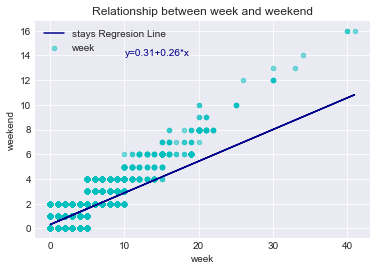

In [27]:
ax1 = booking.plot(kind='scatter', x='stays_in_week_nights', y='stays_in_weekend_nights', color='c', alpha=0.5)

# regression lines
plt.plot(booking['stays_in_week_nights'], stays_fit[0] * booking['stays_in_week_nights'] + stays_fit[1], color='darkblue')

# regression equations
plt.text(10, 14,'y={:.2f}+{:.2f}*x'.format( stays_fit[1],  stays_fit[0]), color='darkblue')

# legend, title and labels.
plt.legend(labels=['stays Regresion Line', 'week', 'weekend'])
plt.title('Relationship between week and weekend')
plt.xlabel('week')
plt.ylabel('weekend');

A good way to eliminate noise from your dataset is to remove outliers. It is possible to use the following code to do this, considering the median and quartiles of each feature. 

In [28]:
Q1 = booking.quantile(0.25)
Q3 = booking.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

is_canceled                      1.0
lead_time                      143.0
stays_in_weekend_nights          2.0
stays_in_week_nights             2.0
adults                           0.0
children                         0.0
babies                           0.0
is_repeated_guest                0.0
previous_cancellations           0.0
booking_changes                  0.0
days_in_waiting_list             0.0
adr                             54.0
required_car_parking_spaces      0.0
total_of_special_requests        1.0
dtype: float64


In [29]:
booking['reservation_status_date'] = pd.to_numeric(booking['reservation_status_date'])
booking['arrivale_date'] = pd.to_numeric(booking['arrivale_date'])

In [30]:
#(booking < (Q1 - 1.5 * IQR)) |(booking > (Q3 + 1.5 * IQR))

In [31]:
booking = booking[~((booking < (Q1 - 1.5 * IQR)) |(booking > (Q3 + 1.5 * IQR))).any(axis=1)]
booking.shape

(50660, 25)

after filtering the data now we passed from (102894, 25) to (50758,25) observations. Plotting this is possible see graphically that outliers have been reduce from the data.

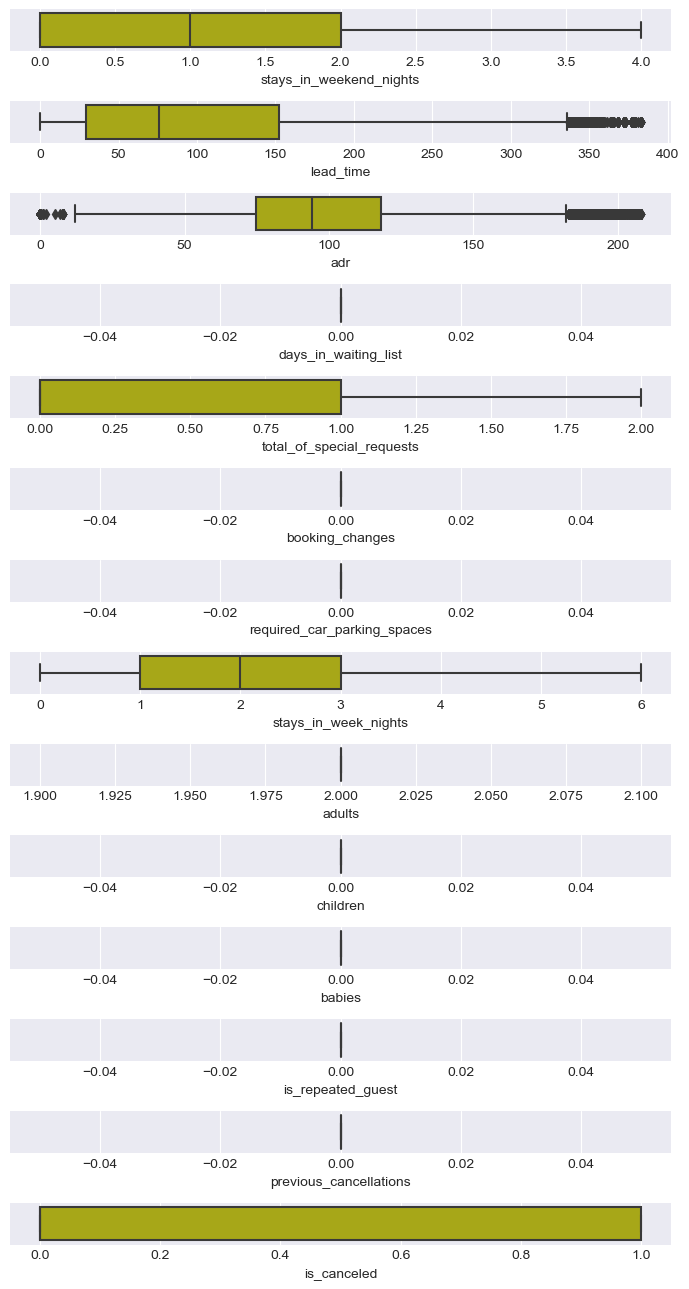

In [32]:
fig, ax = plt.subplots(14,1, dpi=100, figsize=(7,13))

sns.boxplot(x="stays_in_weekend_nights", data=booking, color='y', ax=ax[0])
sns.boxplot(x="lead_time", data=booking, color='y',ax=ax[1])
sns.boxplot(x="adr", data=booking, color='y',ax=ax[2])
sns.boxplot(x="days_in_waiting_list", data=booking, color='y',ax=ax[3])
sns.boxplot(x="total_of_special_requests", data=booking, color='y',ax=ax[4])
sns.boxplot(x="booking_changes", data=booking, color='y',ax=ax[5])
sns.boxplot(x="required_car_parking_spaces", data=booking, color='y',ax=ax[6])
sns.boxplot(x="stays_in_week_nights", data=booking, color='y',ax=ax[7])
sns.boxplot(x="adults", data=booking, color='y',ax=ax[8])
sns.boxplot(x="children", data=booking, color='y',ax=ax[9])
sns.boxplot(x="babies", data=booking, color='y',ax=ax[10])
sns.boxplot(x="is_repeated_guest", data=booking, color='y',ax=ax[11])
sns.boxplot(x="previous_cancellations", data=booking, color='y',ax=ax[12])
sns.boxplot(x="is_canceled", data=booking, color='y',ax=ax[13])


plt.tight_layout();

After filtering the data, some variables are 0. These columns will be eliminated, since the information is not relevant enough. 

In [33]:
booking = booking.drop(columns = ['previous_cancellations', 'is_repeated_guest', 'babies', 'children', 'booking_changes', 'required_car_parking_spaces', 'days_in_waiting_list', 'adults'])
booking['reservation_status_date'] = pd.to_datetime(booking['reservation_status_date'])
booking['arrivale_date'] = pd.to_datetime(booking['arrivale_date'])

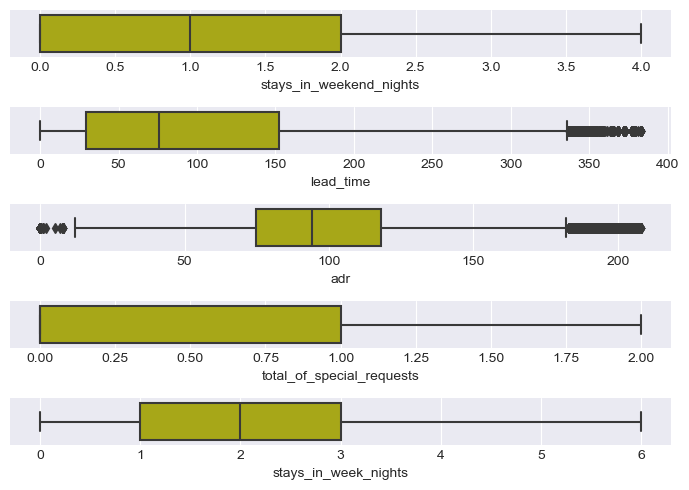

In [34]:
fig, ax = plt.subplots(5,1, dpi=100, figsize=(7,5))

sns.boxplot(x="stays_in_weekend_nights", data=booking, color='y', ax=ax[0])
sns.boxplot(x="lead_time", data=booking, color='y',ax=ax[1])
sns.boxplot(x="adr", data=booking, color='y',ax=ax[2])
sns.boxplot(x="total_of_special_requests", data=booking, color='y',ax=ax[3])
sns.boxplot(x="stays_in_week_nights", data=booking, color='y',ax=ax[4])

plt.tight_layout();

Variables such as 'lead_time' and 'adr' have extremely different values compared to the others, so it is necessary to standardize the data in order to perform a proper analysis. 

In [35]:
features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights','adr', 'total_of_special_requests']
x = booking.loc[:, features].values

In [36]:
x = StandardScaler().fit_transform(x)

In [37]:
pd.DataFrame(data = x, columns = features).head()

lead_time  stays_in_weekend_nights  stays_in_week_nights       adr  \
0   1.771041                -1.076219             -0.313474  0.095217   
1   1.771041                -1.076219             -0.313474  0.095217   
2   1.771041                -1.076219             -0.313474  0.095217   
3   1.771041                -1.076219             -0.313474  0.095217   
4   1.771041                -1.076219             -0.313474  0.095217   

   total_of_special_requests  
0                  -0.815293  
1                  -0.815293  
2                  -0.815293  
3                  -0.815293  
4                  -0.815293

Checking the correlation between variables after standarize them. 

is_canceled  lead_time  stays_in_weekend_nights  \
is_canceled                   1.000000   0.216072                -0.039500   
lead_time                     0.216072   1.000000                 0.050644   
stays_in_weekend_nights      -0.039500   0.050644                 1.000000   
stays_in_week_nights         -0.000153   0.178680                 0.228227   
adr                           0.080909  -0.061687                -0.040717   
total_of_special_requests    -0.239011  -0.088577                 0.025454   

                           stays_in_week_nights       adr  \
is_canceled                           -0.000153  0.080909   
lead_time                              0.178680 -0.061687   
stays_in_weekend_nights                0.228227 -0.040717   
stays_in_week_nights                   1.000000  0.004475   
adr                                    0.004475  1.000000   
total_of_special_requests              0.037897  0.128692   

                           total_of_special_requests  
is_canceled                                -0.239011  
lead_time                                  -0.088577  
stays_in_weekend_nights                     0.025454  
stays_in_week_nights                        0.037897  
adr                                         0.128692  
total_of_special_requests                   1.000000

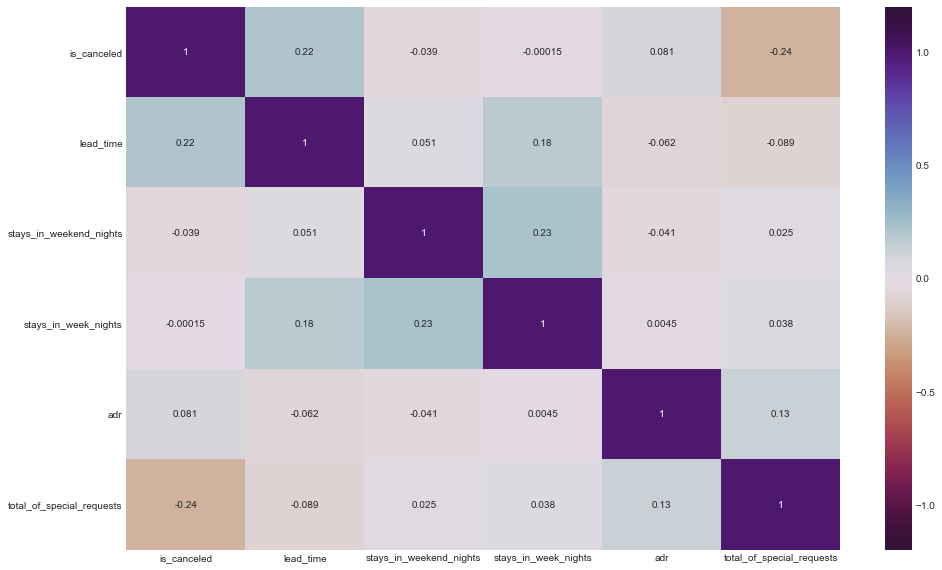

In [38]:
plt.figure(figsize=(16,10))
C = booking.corr()
sns.heatmap(C,cmap="twilight_shifted_r", vmin=-1.2, vmax=1.2, annot=True);
C

Working the data, one new column is added in order to find a correlation between quantitative and qualitative variables. 

In [39]:
booking['days_per_week'] = booking['stays_in_weekend_nights'] + booking['stays_in_week_nights']

In [40]:
booking['assigned_room_type'].value_counts()

A    34964
D    10737
E     2787
F      683
B      610
C      481
G      204
I       90
K       60
H       44
Name: assigned_room_type, dtype: int64

Graphically is possible see that exist a relatioship between this variables, for example customer by contract normally is staying 4 days or more in rooms 'E','D','C' and 'F'.

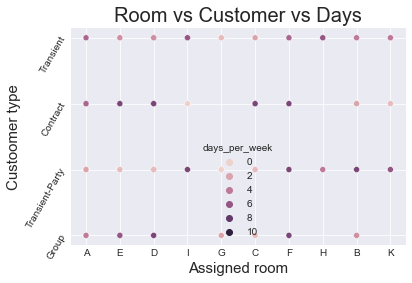

In [41]:
sns.scatterplot(data=booking, x="assigned_room_type", y="customer_type", hue = 'days_per_week')
plt.xlabel("Assigned room", size=15)
plt.ylabel("Custoomer type", size=15)
plt.title("Room vs Customer vs Days", size=20)
plt.yticks(rotation=60);

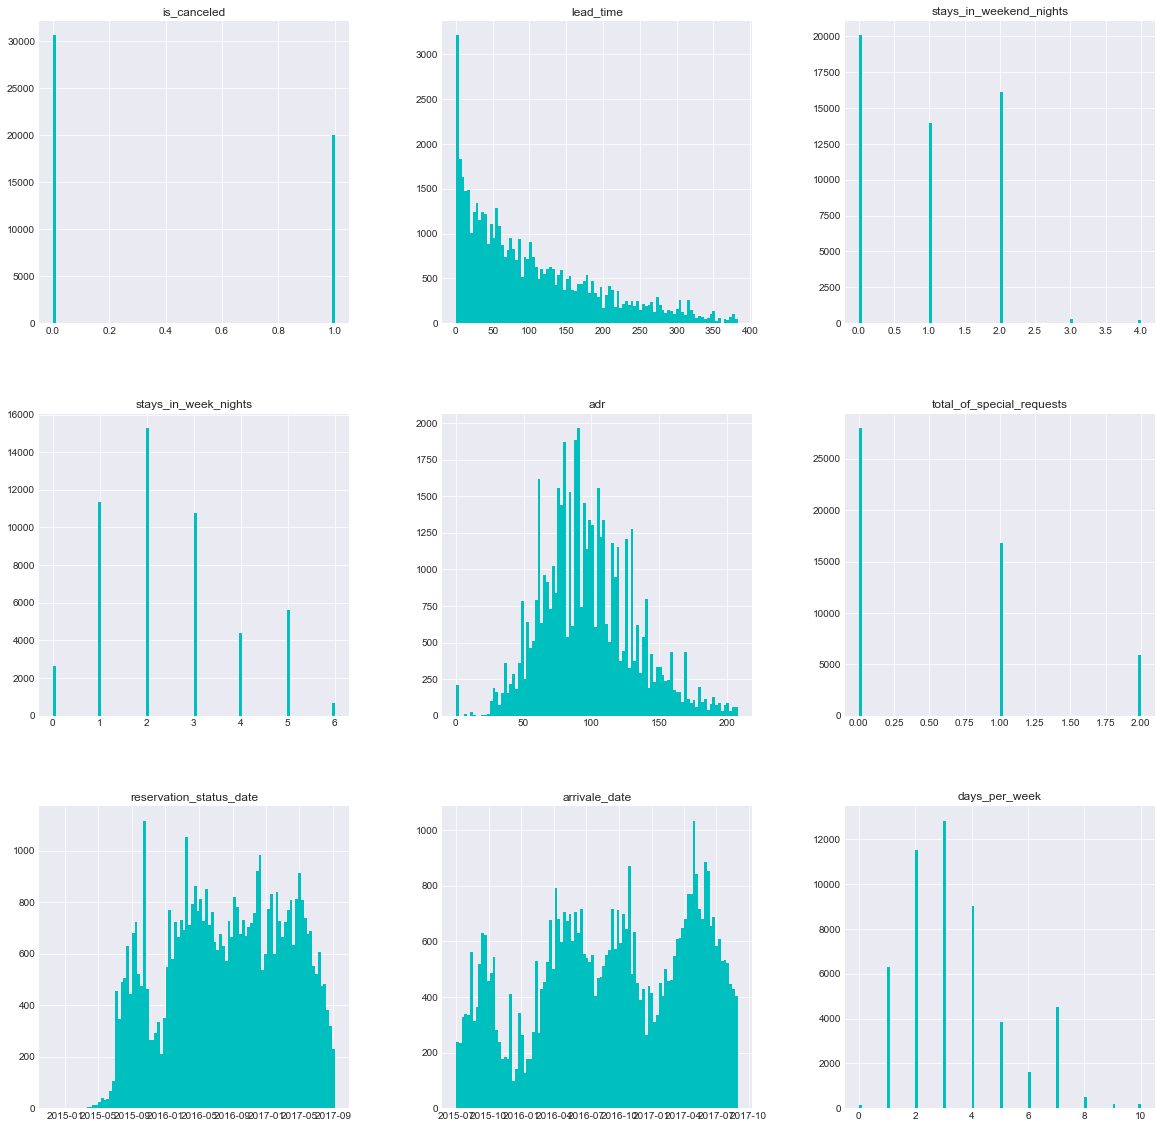

In [42]:
booking.hist(bins=100, figsize=(20,20), color='c');

Now applying PCA and after using fit_transform method of dimensionality reduction is possible modify the dataset and this allows us to zeroing out some of the smallest variables in order to preserve the maximal data variance possible.

In [43]:
pca = PCA()
pca.fit(x)
PCA(copy=True, whiten=False)

PCA()

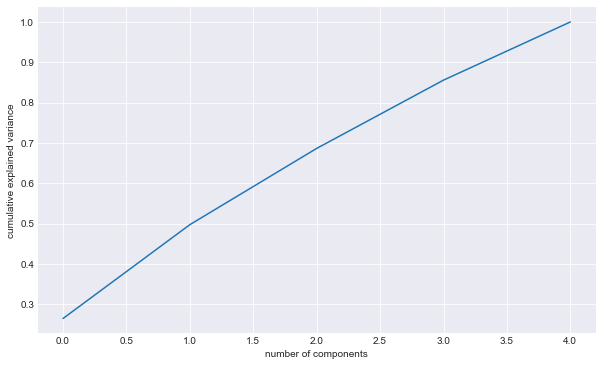

In [44]:
fig, ax = plt.subplots(figsize=(10,6))
pca = PCA().fit(x.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [45]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

In [46]:
print("Original shape: {}".format(str(booking.shape)))
print("Reduced shape: {}".format(str(principalComponents.shape)))

Original shape: (50660, 18)
Reduced shape: (50660, 3)


In [47]:
pca_booking = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3'])

In [48]:
pca_booking.head()

pc1       pc2       pc3
0  0.154707 -1.277446  1.788694
1  0.154707 -1.277446  1.788694
2  0.154707 -1.277446  1.788694
3  0.154707 -1.277446  1.788694
4  0.154707 -1.277446  1.788694

In [49]:
print("pca components: {}".format(pca.components_))
print("pca explained variance: {}".format(pca.explained_variance_))
print("pca explained variance ratio: {}".format(pca.explained_variance_ratio_))

pca components: [[ 0.49823483  0.54361278  0.64114705 -0.19071711 -0.09383309]
 [-0.24119986  0.24439679  0.2548261   0.58346476  0.69045302]
 [ 0.63760004 -0.51615569  0.09302851  0.55561605 -0.09841748]]
pca explained variance: [1.32550881 1.16271274 0.94500849]
pca explained variance ratio: [0.26509653 0.23253796 0.18899797]


In [50]:
plot_pca_booking = pd.concat([pca_booking,], axis = 1)
plot_pca_booking.head(5)

pc1       pc2       pc3
0  0.154707 -1.277446  1.788694
1  0.154707 -1.277446  1.788694
2  0.154707 -1.277446  1.788694
3  0.154707 -1.277446  1.788694
4  0.154707 -1.277446  1.788694

Now three columns must be created with the .concat() function using the components found that meet the best accuracy, this in order to be represented graphically. It is possible see that the features have a strong positive relationship in comparison of the others components.

Text(0, 0.5, 'Principal components')

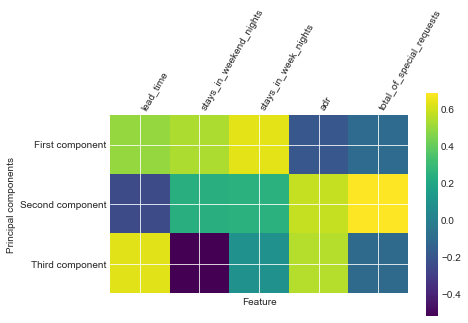

In [51]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2], ["First component", "Second component", 'Third component'])
plt.colorbar()
plt.xticks(range(len(features)),
features, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

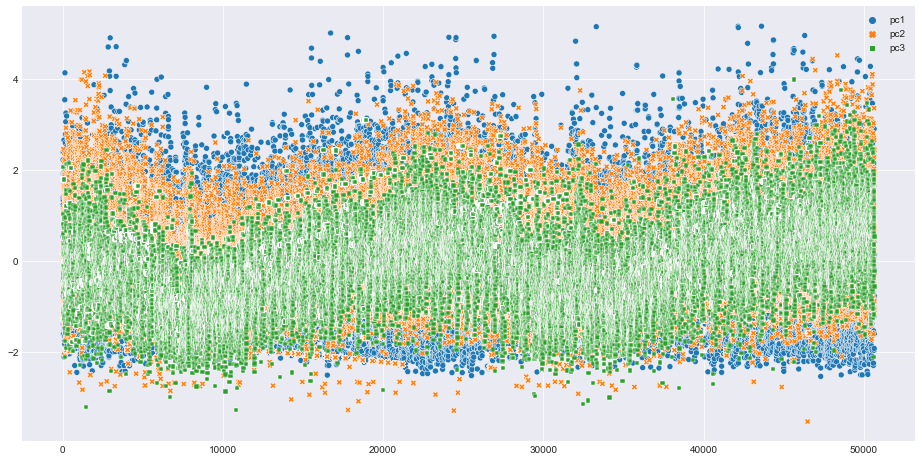

In [52]:
plt.figure(figsize=(16, 8))
ax = sns.scatterplot(data = plot_pca_booking)

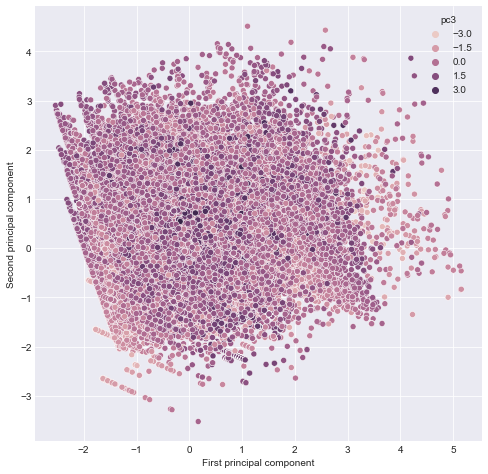

In [53]:
plt.figure(figsize=(8, 8))
c = sns.scatterplot(x='pc1', y='pc2', hue='pc3', data=plot_pca_booking)
plt.xlabel("First principal component")
plt.ylabel("Second principal component");


The variable 'total_of_special_requests' was taken on regard of ML analysis, considering that the axes have X 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adr' and Y 'total_of_special_requests'

In [54]:
feature_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adr']
X = booking[feature_cols] 
y = booking['total_of_special_requests'] 
X, y

(        lead_time  stays_in_weekend_nights  stays_in_week_nights  adr
 75560         257                        0                     2  101
 75561         257                        0                     2  101
 75562         257                        0                     2  101
 75564         257                        0                     2  101
 75565         257                        0                     2  101
 75566         257                        0                     2  101
 75567         257                        0                     2  101
 75568         257                        0                     2  101
 75569         257                        0                     2  101
 75570         257                        0                     2  101
 75571         257                        0                     2  101
 75572         257                        0                     2  101
 75573         257                        0                     2  101
 75574

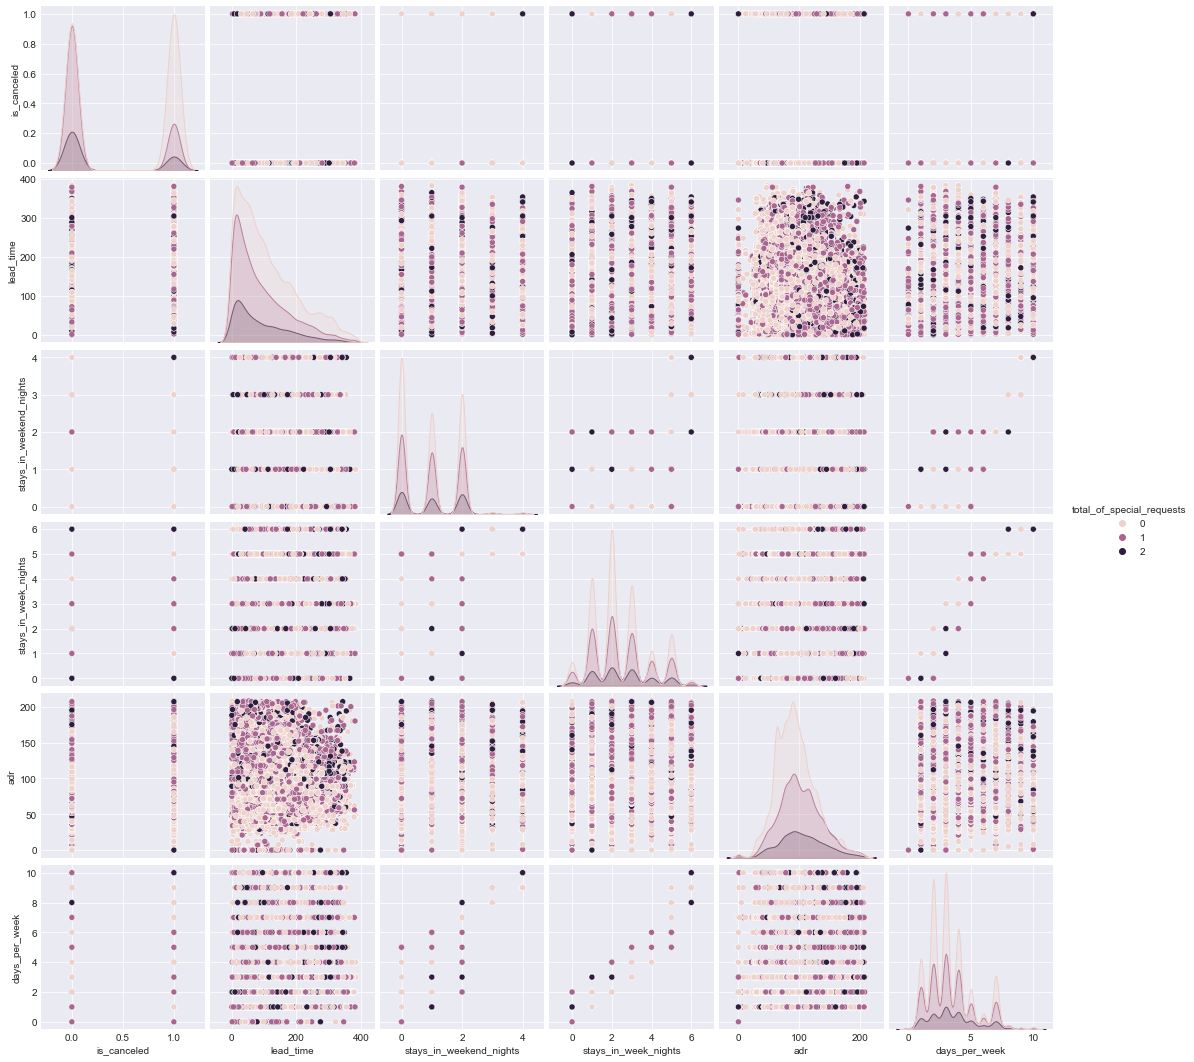

In [55]:
sns.pairplot(booking, hue = 'total_of_special_requests');

ML analysis will be divided into 70% training and 30% testing. Randomforest is the ML model chosen to find an accurate prediction of the possible outcome, the depth of the forest is 12 and the number of trees is 100.
The accuracy of the test is 60% and the accuracy of the train is 69%, this means that the risk of the output being overfitted or underfitted  is low.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [57]:
clf=RandomForestClassifier(max_depth=12, n_estimators=100, random_state=42)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [58]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5997499671009343


In [59]:
print("Score of the classifier with nonrandom train split: ", clf.score(X_train.values, y_train.values))
print("Score of the classifier with nonrandom test split: ", clf.score(X_test.values, y_test.values))

Score of the classifier with nonrandom train split:  0.6996503299306299
Score of the classifier with nonrandom test split:  0.5997499671009343


Using the function predict is possible have a real output of the model beaing applied. In this the output is accurated.

In [60]:
clf.predict([[257, 0, 2, 101]])

array([0], dtype=int64)

In [61]:
booking.loc[75581]

hotel                                 City Hotel
is_canceled                                    0
lead_time                                    257
stays_in_weekend_nights                        0
stays_in_week_nights                           2
meal                                          HB
country                                      PRT
distribution_channel                       TA/TO
reserved_room_type                             A
assigned_room_type                             A
deposit_type                          No Deposit
customer_type                          Transient
adr                                          101
total_of_special_requests                      0
reservation_status                     Check-Out
reservation_status_date      2015-07-03 00:00:00
arrivale_date                2015-07-01 00:00:00
days_per_week                                  2
Name: 75581, dtype: object

It is possible to review the variables on order to choose which features are more important. 

In [62]:
print(clf.fit(X_train,y_train).feature_importances_)

[0.42870719 0.06815443 0.10529051 0.39784787]


<BarContainer object of 4 artists>

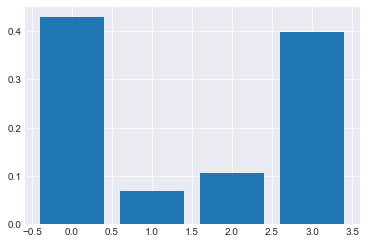

In [63]:
plt.bar(np.arange(len(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adr'])) , height = clf.fit(X_train,y_train).feature_importances_)

'stays_in_weekend_nights' is the variable with least importance between all of them so it will be remove and the ML model tested again.

In [64]:
feature_cols = ['lead_time',  'stays_in_week_nights', 'adr']
X2 = booking[feature_cols] 
y2 = booking['total_of_special_requests'] 
X2, y2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3) 

In [65]:
clf = RandomForestClassifier(max_depth=12, n_estimators=100, random_state=42)

clf.fit(X2_train,y2_train)

y2_pred=clf.predict(X2_test)

print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))

Accuracy: 0.6013949203842611


Even thought that 'stays_in_weekend_nights' has least importance than the others ones the accuracy of the model decreace after remove it.

In [66]:
print("Score of the classifier with nonrandom train split: ", clf.score(X2_train.values, y2_train.values))
print("Score of the classifier with nonrandom test split: ", clf.score(X2_test.values, y2_test.values))

Score of the classifier with nonrandom train split:  0.6880886582821047
Score of the classifier with nonrandom test split:  0.6013949203842611


Using a second ML model(GaussianNB) using same variables as with randomforest for analyze the data. this classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [67]:
X_gnb = booking[['is_canceled', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adr']]
y_gnb = booking['total_of_special_requests']

The data will be splitted in train(70%) and test again(30%), before apply the model is neccesary standarize the data.

In [68]:
X_gnb_train, X_gnb_test, y_gnb_train, y_gnb_test = train_test_split(X_gnb, y_gnb, test_size = 0.30, random_state = 50)
X_gnb_train.shape, X_gnb_test.shape

((35462, 4), (15198, 4))

In [69]:
sc = StandardScaler()
X_gnb_train = sc.fit_transform(X_gnb_train)
X_gnb_test = sc.transform(X_gnb_test)

The model will use the data in regard to train a model in a predictive way, this in order to predict futures outputs.

In [70]:
nvclassifier = GaussianNB()
nvclassifier.fit(X_gnb_train, y_gnb_train)

GaussianNB()

In [71]:
y_pred_gnb = nvclassifier.predict(X_gnb_test)
print(y_pred_gnb)

[0 1 0 ... 1 0 0]


Now comparing the tested values with predicted values, we can realize how accurate is it. 

In [72]:
y_compare = np.vstack((y_gnb_test,y_pred_gnb)).T

y_compare[:10,:]

array([[0, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 1]], dtype=int64)

 Now using confusion matrix, we are evaluating the performance of a classification model The matrix compares the actual target values with those predicted by the machine learning model. 
 Now we can see how many correct and false prediction were done by the model and the accuracy that reach a level of 58%.

In [73]:
cm = confusion_matrix(y_gnb_test, y_pred_gnb)
print(cm, cm.shape)

[[7309 1131    0]
 [3416 1568    0]
 [1163  611    0]] (3, 3)


In [74]:
rowsCols = cm.shape
corrPred = 0
falsePred = 0

for row in range(rowsCols[0]):
    for col in range(rowsCols[1]):
        if row == col:
            corrPred +=cm[row, col]
        else:
            falsePred += cm[row, col]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))   

Correct predictions:  8877
False predictions 6321


Accuracy of the Naive Bayes Clasification is:  0.5840900118436636


# Conclusion

Considering all the models analyzed in this study, it is possible to realize that this dataset does not present a linear behavior, so it is necessary to treat it as a qualification. Although the approach was to predict if the clients will ask for some extra service when renting a room, using the models these did not show a high correlation, this means that the variables do not depend in great quantity on the others. However, the analysis showed that factors such as the room, the number of days and the price of the room can influence to a certain extent the use of some extra service.
The models presented around 60% precision, which is moderate, but by modifying some options in the randomforest model it is possible to obtain better precision but taking the risk of overfitting the study.

# Reinforcement Learning

Reinforcement Learning is a specific area of ML, it is employed by various software and machines to find the best possible behaviour or path it should take in certain situation. It is about an interactive environment created in which learn by trial and error using feedback from its own actions and experiences. 
To get the machine doing what the programmer wants, use a process where the artificial intelligent obtain rewards or penalties for the actions that has done. Its goal is maximize the total reward. The designer set some rules and the model has to figure out how to solve the game, starting for some random trials and finishing with sophisticated tactics that humans are not able to perform.
“This neural network learning method helps you to learn how to attain a complex objective or maximize a specific dimension over many steps.” (Budek, 2018)
Reinforcement Learning in real life is used in many different areas such as:
-	Industry automation: In industry exist task that are too difficult to be performed by a human, for this RL is an important tool, learning-based robots are able to carry on various tasks more efficient than human beings, even considering that some of this task could be dangerous for people. (Mwiti, 2021)
-	Trading and finance: Using RL and agent can decide if it is correct hold, sell or buy stock, this model is evaluated using market benchmark standards in order to ensure that is working properly. (Mwiti, 2021)
-	Healthcare: In this case RL is used to find the best policies considering previous experiences without need for previous information on the mathematical model of biological systems. (Mwiti, 2021)

 



Working with Reinforcement Learning, we have two sub groups Passive and Active. Passive is when the policies are fixed, that means that cannot be changed and Active the agent is able to modify the policies in order to improve the output, some cases that can be related with this sub groups are:
When playing Super Mario the character is just able to perform certain movements, ML use this fixed policies and give an output showing how good are these. Using this ML is a good way to prove the performance of a game. (Bhatt, 2018)

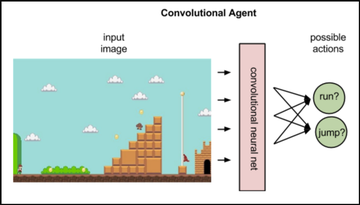

In [75]:
Image.open('resized_compressed_image.png')

Some examples of Active RL are “the game of Pong” and “Driven Robots In A Factory”, both cases use the environment to learn which decision is better improving the performance of the task with the most efficacy, speed, and precision. In this case the policies are not fixed, because of that for each reward and error, the ML model modify the policies in order to achieve the best performance possible.

Let’s take the game of Pong (vintage Atari games are used often to explain the inner working of reinforcement learning) and imagine we’re trying to teach an agent how to play it.
The only feedback that is provided is that from the scoreboard. Each time the model manages to score a point it gets a +1 reward and each time it loses a point it gets a -1 penalty. Based on this, it will iteratively update its policies so that the actions that bring rewards are more probable and those resulting in a penalty are filtered out. (Kovtun, 2021)
 


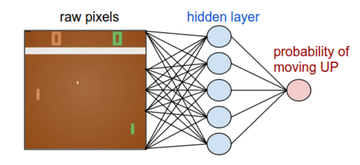

In [76]:
Image.open('resized_pong_image.png')


The second case The industrial robot is clever enough to train itself to perform a particular job, Robots are performing many redundant duties, but some are also using deep reinforcement to learn how to perform their designated tasks, as the robot performs a particular task with an object, it captures the action on video, even if the output is wrong, the robot ‘learns’ from it. This is all part of a deep learning model that controls and influences the robot’s future actions. (Kuzmenko, 2020)

# Referencies

Bhatt, S., 2018. Explaining Reinforcement Learning: Active vs Passive. [En línea] 
Available at: https://www.kdnuggets.com/2018/06/explaining-reinforcement-learning-active-passive.html
[Último acceso: 20 May 2021].
Budek, B. O. a. K., 2018. What is reinforcement learning? The complete guide. [En línea] 
Available at: https://deepsense.ai/what-is-reinforcement-learning-the-complete-guide/
[Último acceso: 20 May 2021].
Kovtun, M., 2021. Reinforcement Learning Applications: A Brief Guide on How to Get Business Value from RL. [En línea] 
Available at: https://perfectial.com/blog/reinforcement-learning-applications/
[Último acceso: 20 May 2021].
Kuzmenko, E., 2020. Reinforcement Learning Driven Robots In A Factory. [En línea] 
Available at: https://kitrum.com/blog/reinforcement-learning-for-business-real-life-examples/
[Último acceso: 20 May 2021].
Mwiti, D., 2021. Industry automation with Reinforcement Learning. [En línea] 
Available at: https://neptune.ai/blog/reinforcement-learning-applications#:~:text=Some%20of%20the%20autonomous%20driving,by%20learning%20automatic%20parking%20policies.
[Último acceso: 20 May 2021].
Mwiti, D., 2021. Reinforcement Learning applications in healthcare. [En línea] 
Available at: https://neptune.ai/blog/reinforcement-learning-applications#:~:text=Some%20of%20the%20autonomous%20driving,by%20learning%20automatic%20parking%20policies.
[Último acceso: 20 May 2021].
Mwiti, D., 2021. Reinforcement Learning applications in trading and finance. [En línea] 
Available at: https://neptune.ai/blog/reinforcement-learning-applications#:~:text=Some%20of%20the%20autonomous%20driving,by%20learning%20automatic%20parking%20policies.
[Último acceso: 20 May 2021].
Parthasarathy, D., 2016. Write an AI to win at Pong from scratch with Reinforcement Learning. [En línea] 
Available at: https://medium.com/@dhruvp/how-to-write-a-neural-network-to-play-pong-from-scratch-956b57d4f6e0
[Último acceso: 20 May 2021].
Vorhies, W., 2017. Reinforcement Learning Part 3 – Challenges & Considerations. [En línea] 
Available at: https://www.datasciencecentral.com/profiles/blogs/reinforcement-learning-part-3-challenges-considerations
[Último acceso: 20 May 2021].
Mostipak, J., 2020. Hotel booking demand. [En línea] 
Available at: https://www.kaggle.com/jessemostipak/hotel-booking-demand
[Último acceso: 22 May 2021].
